In [1]:
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Caricamento dei dati

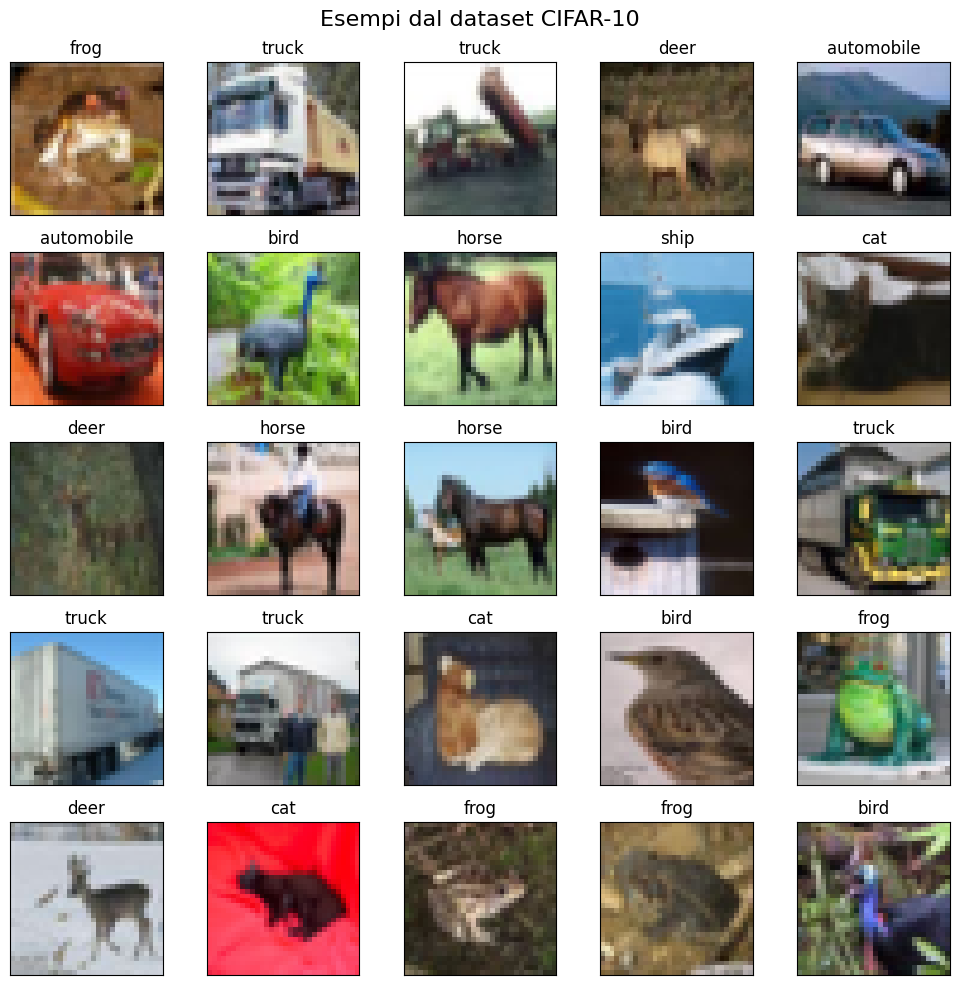

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Nomi delle classi
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizza le prime 25 immagini con etichette
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.suptitle("Esempi dal dataset CIFAR-10", fontsize=16)
plt.tight_layout()
plt.show()

In [3]:
(x_train, y_train), (x_test, y_test)

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
# Normalizzazione delle immagini, per far sì che i valori siano tra 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
(x_train, y_train), (x_test, y_test) 

((array([[[[0.23137255, 0.24313725, 0.24705882],
           [0.16862745, 0.18039216, 0.17647059],
           [0.19607843, 0.18823529, 0.16862745],
           ...,
           [0.61960784, 0.51764706, 0.42352941],
           [0.59607843, 0.49019608, 0.4       ],
           [0.58039216, 0.48627451, 0.40392157]],
  
          [[0.0627451 , 0.07843137, 0.07843137],
           [0.        , 0.        , 0.        ],
           [0.07058824, 0.03137255, 0.        ],
           ...,
           [0.48235294, 0.34509804, 0.21568627],
           [0.46666667, 0.3254902 , 0.19607843],
           [0.47843137, 0.34117647, 0.22352941]],
  
          [[0.09803922, 0.09411765, 0.08235294],
           [0.0627451 , 0.02745098, 0.        ],
           [0.19215686, 0.10588235, 0.03137255],
           ...,
           [0.4627451 , 0.32941176, 0.19607843],
           [0.47058824, 0.32941176, 0.19607843],
           [0.42745098, 0.28627451, 0.16470588]],
  
          ...,
  
          [[0.81568627, 0.66666667, 0.37

* **Normalizzazione**: La normalizzazione aiuta ad accelerare la convergenza del modello. Le immagini CIFAR-10 sono memorizzate come interi (tra 0 e 255), quindi dividendo per 255 otteniamo valori tra 0 e 1. Questo aiuta l'ottimizzazione e riduce la varianza nei dati.

* **Forma del dataset**: `x_train` e `x_test` sono rispettivamente le immagini di addestramento e di test, mentre `y_train` e `y_test` sono le etichette corrispondenti.

# Creazione del modello 

In [6]:
model = models.Sequential([
    # Primo strato convoluzionale: 32 filtri di dimensione 3x3, ReLU come funzione di attivazione
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),  # Strato di max-pooling
    
    # Secondo strato convoluzionale: 64 filtri di dimensione 3x3
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Strato di max-pooling
    
    # Terzo strato convoluzionale: 128 filtri di dimensione 3x3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Strato di max-pooling
    
    # Aggiungi il Dropout per ridurre il rischio di overfitting dopo i layer convoluzionali
    layers.Dropout(0.3),  # 30% dei neuroni disattivati casualmente
    
    # Appiattimento dell'output per passarlo agli strati completamente connessi
    layers.Flatten(),
    
    # Strato denso con 128 neuroni e ReLU
    layers.Dense(128, activation='relu'),
    
    # Aggiungi il Dropout anche dopo lo strato denso
    layers.Dropout(0.5),  # 50% dei neuroni disattivati
    
    # Strato finale di output con 10 neuroni (uno per ciascuna classe)
    layers.Dense(10, activation='softmax')  # Softmax per classificazione multi-classe
])

C:\Users\HP\anaconda32\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* `Conv2D(32, (3, 3), activation='relu')`: Questo è uno strato convoluzionale con 32 filtri di dimensione 3x3. L'uso di ReLU come funzione di attivazione introduce non linearità nel modello. La funzione di attivazione ReLU aiuta a combattere il problema della saturazione (nel caso di funzioni come sigmoid o tanh).

* `MaxPooling2D((2, 2))`: Dopo ogni strato convoluzionale, usiamo uno strato di max-pooling che riduce la dimensione dell'immagine (32x32 a 16x16, 16x16 a 8x8, ecc.). Ciò consente al modello di concentrarsi su caratteristiche più rilevanti e ridurre la complessità computazionale.

* `Flatten()`: Dopo aver estratto le caratteristiche con i filtri convoluzionali, dobbiamo "appiattire" il risultato (convertirlo in un vettore 1D) per passarlo agli strati densi successivi.

* `Dense(128)`: Uno strato completamente connesso con 128 neuroni, che fornisce un'ulteriore elaborazione delle caratteristiche estratte. La funzione di attivazione ReLU è utilizzata anche qui.

* `layers.Dropout(0.5)`: Il dropout è una tecnica di regolarizzazione che disattiva casualmente il 50% dei neuroni in questo strato durante l'addestramento. Questo aiuta a prevenire il overfitting, forzando la rete a non dipendere troppo da singoli neuroni e migliorando la sua capacità di generalizzare.

* `Dense(10)`: Lo strato finale di output ha 10 neuroni, uno per ciascuna delle 10 classi nel dataset CIFAR-10 (aereo, automobile, ecc.).

# Compilazione del Modello

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compilazione del modello
model.compile(
    optimizer='adam',  # Ottimizzatore Adam, che è efficiente per il deep learning
    loss=tf.keras.losses.SparseCategoricalCrossentropy,  # Funzione di perdita
    metrics=['accuracy']  # Metriche da monitorare (accuratezza)
)

`optimizer='adam'`: L'ottimizzatore Adam è uno degli ottimizzatori più popolari per le reti neurali. Si adatta in modo dinamico ai dati e ha una buona capacità di generalizzazione.

`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`: La funzione di perdita è SparseCategoricalCrossentropy, che è adatta per la classificazione multi-classe con etichette numeriche intere (invece di one-hot encoding).

`metrics=['accuracy']`: Monitoriamo l'accuratezza del modello durante l'addestramento e la valutazione.

# Addestramento del Modello

In [9]:
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.2745 - loss: 1.9320 - val_accuracy: 0.5364 - val_loss: 1.3013
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.5031 - loss: 1.3710 - val_accuracy: 0.5868 - val_loss: 1.1484
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5728 - loss: 1.2082 - val_accuracy: 0.6192 - val_loss: 1.0557
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6031 - loss: 1.1181 - val_accuracy: 0.6531 - val_loss: 0.9779
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6348 - loss: 1.0435 - val_accuracy: 0.6648 - val_loss: 0.9510
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6521 - loss: 0.9936 - val_accuracy: 0.6694 - val_loss: 0.9375
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6677 - loss: 0.9456 - val_accuracy: 0.6804 - val_loss: 0.9121
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6766 -

* `epochs=40`: Addestriamo il modello per 40 epoche. Ogni epoca rappresenta un ciclo completo sui dati di addestramento.

* `validation_data=(x_test, y_test)`: Utilizziamo i dati di test per calcolare la validità del modello durante l'addestramento e monitorare l'overfitting.

# Valutazione del Modello

In [10]:
test_loss, test_acc = model.evaluate(x_train, y_train, verbose=2)
print(f"Test accuracy: {test_acc}")

1563/1563 - 17s - 11ms/step - accuracy: 0.8891 - loss: 0.3484
Test accuracy: 0.8891400098800659


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) 
print(f"Test accuracy: {test_acc}")

313/313 - 3s - 11ms/step - accuracy: 0.7472 - loss: 0.7874
Test accuracy: 0.7472000122070312


# Visualizzazione dei risultati durante le epoche

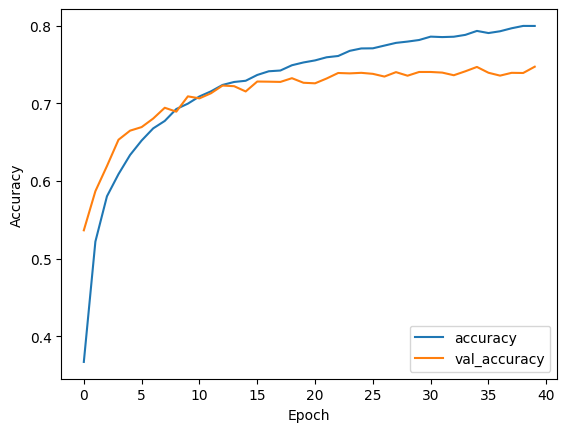

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

* `history.history['accuracy']`: Traccia l'accuratezza del modello sui dati di addestramento.

* `history.history['val_accuracy']`: Traccia l'accuratezza del modello sui dati di validazione (test).

In [13]:
losses = history.history['loss']
losses

[1.7081080675125122,
 1.3264957666397095,
 1.1885643005371094,
 1.1016433238983154,
 1.043128252029419,
 0.9966347813606262,
 0.9542210102081299,
 0.9188979864120483,
 0.8884819746017456,
 0.8638272881507874,
 0.8376856446266174,
 0.8209133744239807,
 0.7964636087417603,
 0.7879995107650757,
 0.7703732848167419,
 0.753907322883606,
 0.7427683472633362,
 0.734528124332428,
 0.7241588830947876,
 0.7074652910232544,
 0.6994330286979675,
 0.6884808540344238,
 0.676788330078125,
 0.669654130935669,
 0.6613653302192688,
 0.6564487218856812,
 0.647470235824585,
 0.6409940719604492,
 0.6265668869018555,
 0.6246936321258545,
 0.6138260364532471,
 0.6119464039802551,
 0.6094840168952942,
 0.6000334024429321,
 0.5899481773376465,
 0.5908712148666382,
 0.5877009034156799,
 0.5751714706420898,
 0.5703418254852295,
 0.5708374381065369]

Text(0, 0.5, 'Loss')

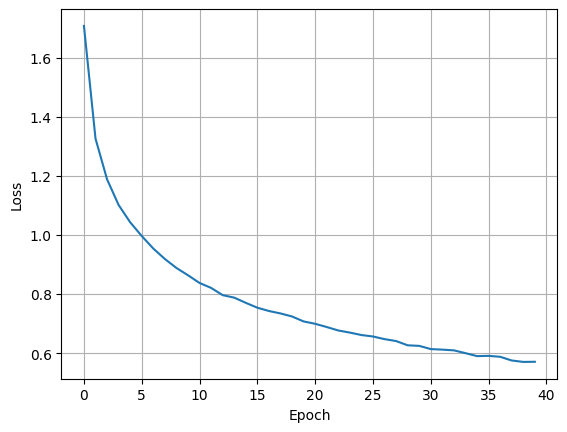

In [14]:
plt.plot(losses)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Loss relativamente alta, si procede con una formalizzazione di un nuovo modello

# Modello 2

In [15]:
model2 = models.Sequential([
    # Primo strato convoluzionale: 32 filtri di dimensione 3x3, ReLU come funzione di attivazione
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),  # Strato di max-pooling
    
    # Secondo strato convoluzionale: 64 filtri di dimensione 3x3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),  # Strato di max-pooling
    
    # Terzo strato convoluzionale: 128 filtri di dimensione 3x3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),  # Strato di max-pooling
    
    # Aggiungi il Dropout per ridurre il rischio di overfitting dopo i layer convoluzionali
    layers.Dropout(0.3),  # 30% dei neuroni disattivati casualmente
    
    # Aggiungi il BatchNormalization per migliorare la stabilità
    layers.BatchNormalization(),
    
    # Appiattimento dell'output per passarlo agli strati completamente connessi
    layers.Flatten(),
    
    # Strato denso con 256 neuroni e ReLU per una maggiore capacità di apprendimento
    layers.Dense(256, activation='relu'),
    
    # Aggiungi il Dropout anche dopo lo strato denso
    layers.Dropout(0.5),  # 50% dei neuroni disattivati
    
    # Strato finale di output con 10 neuroni (uno per ciascuna classe)
    layers.Dense(10, activation='softmax')  # Softmax per classificazione multi-classe
])

* `padding='same'`: agli strati convoluzionali. Questo fa sì che la dimensione delle immagini non venga ridotta troppo dopo ogni convoluzione, il che aiuta a mantenere più informazioni nelle immagini e permette di avere output più grandi per gli strati successivi.
* Sono stati aggiunti due strati convoluzionali in più (128 e 256 filtri), aumentando la profondità della rete
* `BatchNormalization` è stata aggiunta subito dopo il dropout. Questo strato normalizza l'output dei layer precedenti, riducendo la variazione interna delle covariate (internal covariate shift). Aiuta a stabilizzare e accelerare l'allenamento.
* Il numero di neuroni nel layer denso si aumenta a 256. Un numero maggiore di neuroni consente una maggiore capacità di apprendimento per il modello, permettendogli di apprendere rappresentazioni più complesse.
* Il Dropout è stato mantenuto sia dopo gli strati convoluzionali che nel layer denso per prevenire l'overfitting. L'uso di un 30% di dropout dopo i layer convoluzionali e del 50% nei layer densi aiuta a ridurre il rischio che il modello memorizzi i dati di addestramento senza generalizzare.

In [16]:
model2.compile(
    optimizer='adam',  # Ottimizzatore Adam, che è efficiente per il deep learning
    loss=tf.keras.losses.SparseCategoricalCrossentropy,  # Funzione di perdita
    metrics=['accuracy']  # Metriche da monitorare (accuratezza)
)

In [17]:
history2 = model2.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 42ms/step - accuracy: 0.3517 - loss: 1.8032 - val_accuracy: 0.5504 - val_loss: 1.2313
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5639 - loss: 1.2147 - val_accuracy: 0.5959 - val_loss: 1.1556
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6247 - loss: 1.0588 - val_accuracy: 0.6818 - val_loss: 0.9131
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6646 - loss: 0.9549 - val_accuracy: 0.6810 - val_loss: 0.8908
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6824 - loss: 0.9008 - val_accuracy: 0.7143 - val_loss: 0.8091
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7036 - loss: 0.8463 - val_accuracy: 0.7327 - val_loss: 0.7671
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7201 - loss: 0.7980 - val_accuracy: 0.6467 - val_loss: 1.0558
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7258 -

In [18]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2) 
print(f"Test accuracy: {test_acc}")

313/313 - 4s - 14ms/step - accuracy: 0.7917 - loss: 0.6729
Test accuracy: 0.791700005531311


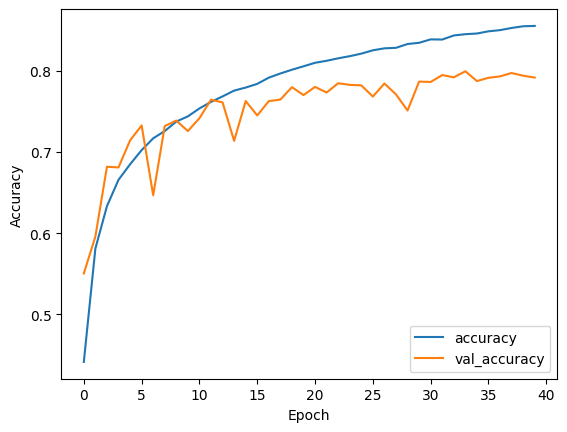

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [22]:
losses2 = history.history['loss']
losses2

[1.5490655899047852,
 1.178954005241394,
 1.036699652671814,
 0.9511293172836304,
 0.8978659510612488,
 0.8531899452209473,
 0.8120747804641724,
 0.7817153930664062,
 0.7515054941177368,
 0.728722333908081,
 0.7021117806434631,
 0.6813678741455078,
 0.6603460311889648,
 0.6434692740440369,
 0.6304795145988464,
 0.6140040159225464,
 0.5922622680664062,
 0.5818372964859009,
 0.5681366920471191,
 0.5557949542999268,
 0.5425031781196594,
 0.5427992939949036,
 0.5239982604980469,
 0.5135061144828796,
 0.5083046555519104,
 0.4929608106613159,
 0.4830096364021301,
 0.4858687222003937,
 0.47084295749664307,
 0.4647636413574219,
 0.45771434903144836,
 0.4542296826839447,
 0.4461454153060913,
 0.43864694237709045,
 0.4332124888896942,
 0.42462754249572754,
 0.42239296436309814,
 0.42151346802711487,
 0.41364622116088867,
 0.4066562056541443]

Text(0, 0.5, 'Loss')

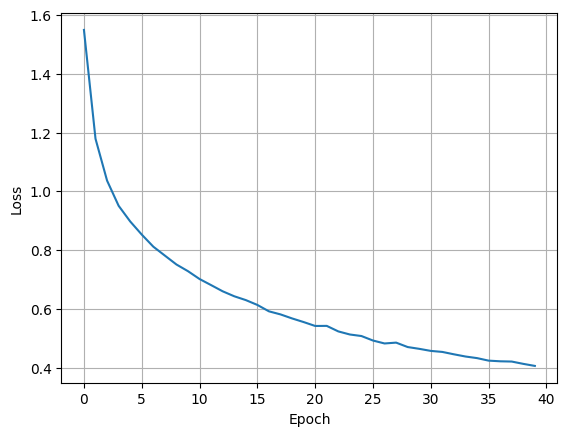

In [23]:
plt.plot(losses2)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')